In [14]:
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import  Dropout
from keras.layers import Layer
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from keras.applications.vgg16 import VGG16 
import os
import copy
from tensorflow.keras.utils import img_to_array
import sys
tf.__version__

'2.10.1'

In [15]:
target = []
data = []

dir='D:\\A.document\\A.opencv\\projects\\apple_garden\\Dataset'
dir_test='D:\\A.document\\A.opencv\\projects\\apple_garden\\\Dataset_test'
#Categories = ['1','2','3','4']
Categories = ['1','3','4']

In [16]:

for i in Categories:
  print("Category is:",i,"\tLabel encoded as:",Categories.index(i))
  target_class = Categories.index(i)
  path = os.path.join(dir,i)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    img_resized =cv2.resize(img_array,(124,124))
    data.append(img_resized)
    target.append(target_class)

data = np.array(data)
target = np.array(target)

print('end')

Category is: 1 	Label encoded as: 0
Category is: 3 	Label encoded as: 1
Category is: 4 	Label encoded as: 2
end


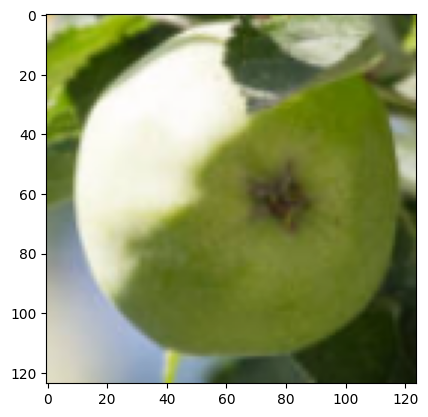

In [17]:
RGB_img=data[50]
plt.imshow(RGB_img)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.02)

X_train.shape

(2351, 124, 124, 3)

In [19]:
X_test.shape

(48, 124, 124, 3)

In [6]:
y_test

array([1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 0,
       0, 0, 2, 0])

In [20]:
class_number = 3

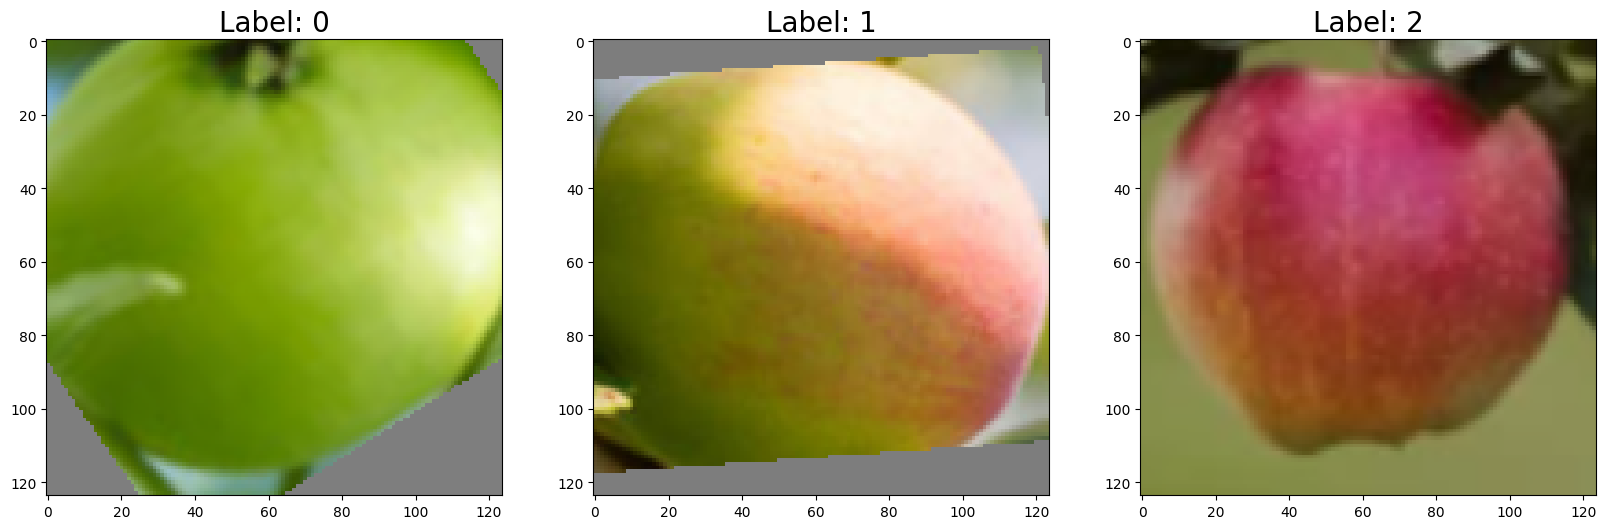

In [42]:
f, ax = plt.subplots(1, class_number, figsize=(20,20))

for i in range(0, class_number):
    apple_sample = X_train[y_train == i][0]
    #apple_sample =cv2.cvtColor(apple_sample,cv2.COLOR_BGR2RGB)
    ax[i].imshow(apple_sample)
    ax[i].set_title("Label: {}".format(i), fontsize=20)

In [21]:

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

print(X_train.shape[0], "train")
print(X_test.shape[0], "test")


y_train = keras.utils.to_categorical(y_train, class_number)
y_test = keras.utils.to_categorical(y_test, class_number)

2351 train
48 test


In [22]:
model = Sequential()

#Apple_model=tf.keras.applications.ResNet50(include_top=False,weights="imagenet",input_shape=(124,124,3))
    

Apple_model=VGG16(weights='imagenet', include_top=False, input_shape=(124,124,3))
for layer in Apple_model.layers:
        layer.trainable=False

model.add(Apple_model)

In [8]:
Apple_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 124, 124, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 124, 124, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 124, 124, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 62, 62, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 62, 62, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 62, 62, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 31, 31, 128)       0     

In [23]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(30, activation='selu'))
model.add( keras.layers.Dense(30, activation='selu'))
# model.add(keras.layers.Dropout(0.2))
model.add( keras.layers.Dense(30, activation='selu'))
model.add( keras.layers.Dense(30, activation='selu'))
#model.add(keras.layers.Dropout(0.2))
# model.add( keras.layers.Dense(128, activation='selu'))
# model.add( keras.layers.Dense(128, activation='selu'))


model.add( keras.layers.Dense(3,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 30)                138270    
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 dense_4 (Dense)             (None, 3)                 9

In [24]:
sgd=keras.optimizers.SGD(clipvalue=0.1)
adagrad_1=keras.optimizers.Adagrad(learning_rate=0.1)
adam=keras.optimizers.Adam(learning_rate=0.01)

In [25]:
model.compile(loss="categorical_crossentropy",
             optimizer=adam,metrics=["accuracy"])

In [26]:
history = model.fit(X_train, y_train,batch_size=12,epochs=3000,validation_split=0.05,
                           callbacks=[keras.callbacks.EarlyStopping(patience=25,monitor='val_accuracy',restore_best_weights=True),
                           keras.callbacks.ModelCheckpoint(filepath='Apple_A22.h5',monitor='val_accuracy',save_best_only=True)])

Epoch 1/3000
187/187 [==============================] - 8s 40ms/step - loss: 1.0763 - accuracy: 0.5410 - val_loss: 1.1003 - val_accuracy: 0.5508
Epoch 2/3000
187/187 [==============================] - 6s 32ms/step - loss: 0.6783 - accuracy: 0.6834 - val_loss: 0.5564 - val_accuracy: 0.7881
Epoch 3/3000
187/187 [==============================] - 6s 31ms/step - loss: 0.4851 - accuracy: 0.8061 - val_loss: 0.9208 - val_accuracy: 0.5424
Epoch 4/3000
187/187 [==============================] - 6s 31ms/step - loss: 0.4831 - accuracy: 0.8021 - val_loss: 0.7580 - val_accuracy: 0.7373
Epoch 5/3000
187/187 [==============================] - 6s 31ms/step - loss: 0.3294 - accuracy: 0.8679 - val_loss: 0.5388 - val_accuracy: 0.7881
Epoch 6/3000
187/187 [==============================] - 6s 31ms/step - loss: 0.2849 - accuracy: 0.8907 - val_loss: 1.0293 - val_accuracy: 0.6610
Epoch 7/3000
187/187 [==============================] - 6s 31ms/step - loss: 0.3623 - accuracy: 0.8648 - val_loss: 0.7836 - val_ac

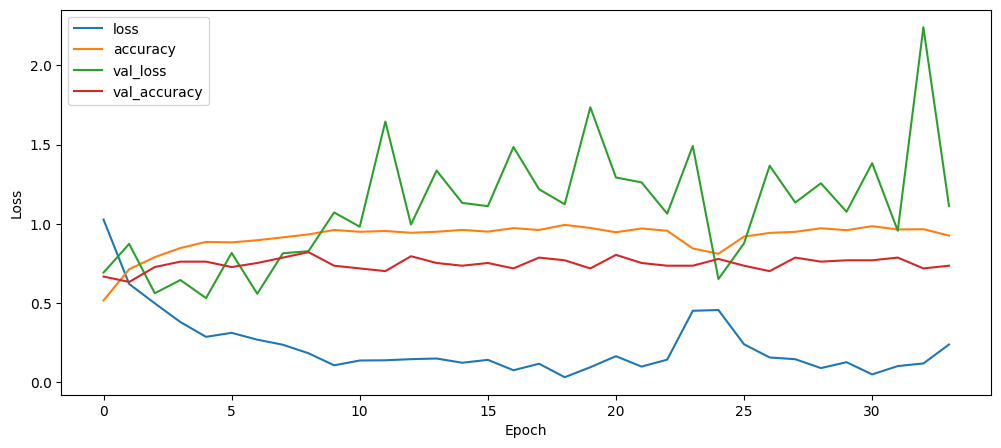

In [35]:
fig,ax = plt.subplots(figsize=(12,5))
ax=plt.plot(history.history["loss"],label="loss")
ax=plt.plot(history.history["accuracy"],label="accuracy")
ax=plt.plot(history.history["val_loss"],label="val_loss")
ax=plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [34]:
model.evaluate(X_test,y_test,verbose=1)

2/2 [==============================] - 4s 1s/step - loss: 0.5830 - accuracy: 0.8958


[0.5829950571060181, 0.8958333134651184]

In [53]:
#y_test

In [66]:
y_pred_A = model.predict(X_test)
y_pred_A = np.argmax(y_pred_A, axis=1)
print(y_pred_A)

In [22]:
y_pred_A.shape

(48,)

In [74]:
#Apple_A1
model2=keras.models.load_model("Apple_A22.h5")
y_pred_classes1 = model2.predict(X_test)
y_pred_classes1 = np.argmax(y_pred_classes1, axis=1)
print(y_pred_classes1)


2/2 [==============================] - 0s 357ms/step
[0 1 0 2 1 2 0 2 0 1 0 1 2 1 2 1 0 1 0 2 2 2 0 2 1 2 2 1 2 2 2 2 1 2 2 2 1
 2 2 2 2 0 1 1]


In [75]:
model2.evaluate(X_test,y_test,verbose=1)

2/2 [==============================] - 0s 43ms/step - loss: 0.8654 - accuracy: 0.7500


[0.8654196262359619, 0.75]

In [21]:
y_test

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0

34


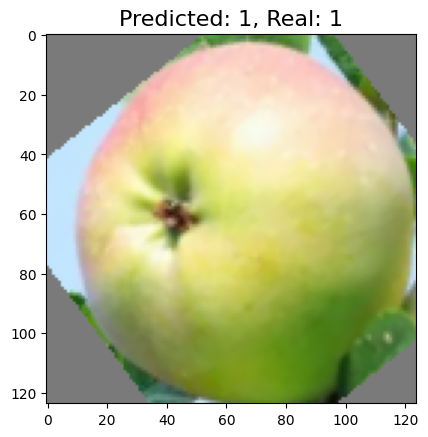

In [64]:
random_idx = np.random.choice(len(X_test))
print(random_idx)
x_sample = X_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes1[random_idx]

plt.title("Predicted: {}, Real: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(124,124,3), cmap='gray')

(124, 124, 3)
(1, 124, 124, 3)
1/1 [==============================] - 1s 796ms/step
[2]


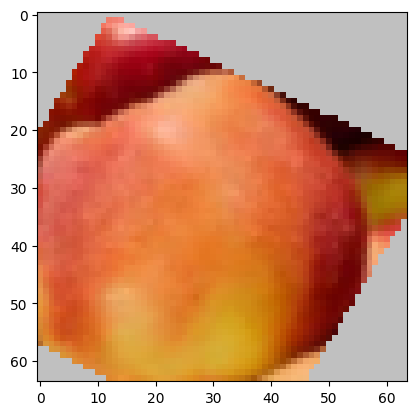

In [65]:
model2=keras.models.load_model("Apple_A1.h5")
img3_1 = cv2.imread('D:\\A.document\\A.opencv\\projects\\apple_garden\\Dataset2\\4\\aug_48_3491.png')
img3_1=cv2.cvtColor(img3_1, cv2.COLOR_BGR2RGB)
plt.imshow(img3_1)

img3=copy.copy(img3_1)

img3=cv2.resize(img3,(124,124))
print(img3.shape)

img = img3.reshape(1, 124,124, 3)
print(img.shape)
img = img.astype('float32')
img = img / 255.0


y_pred1 = model2.predict(img)
y_pred1 = np.argmax(y_pred1, axis=1)
print(y_pred1)
